In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast

import json
import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import scipy.stats as stats

C:\Users\User\Anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file, encoding='utf-8') as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [3]:
json_files = [r'..\Data\drc.json',r'..\Data\egypt.json', r'..\Data\ethiopia.json',
                r'..\Data\kenya.json', r'..\Data\Madagascar.json', r'..\Data\morocco.json',
                r'..\Data\nigeria.json', r'..\Data\rwanda.json', r'..\Data\seychelles.json',
                r'..\Data\tanzania.json', r'..\Data\uganda.json', r'..\Data\namibia.json',
                '..\Data\south_africa.json', '..\Data\malawi.json', r'..\Data\Senegal.json',
                r'..\Data\zambia.json', r'..\Data\Ghana.json', r'..\Data\Botswana.json', 
                r'..\Data\capeverde.json' ]
df = read_json_files(json_files)
df.head()

id        type    category             subcategories  \
0   2704993  ATTRACTION  attraction          [Nature & Parks]   
1   1536776  ATTRACTION  attraction          [Nature & Parks]   
2  13203729  ATTRACTION  attraction  [Shopping, Food & Drink]   
3   8661504       HOTEL       hotel       [Specialty Lodging]   
4  10414108       HOTEL       hotel       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  \
0                                               None   
1                                               None   
2                                               None   
3  Just outside the Virunga National Park boundar...   
4                                               None   

                                               image  photoCount awards  ...  \
0  https://media-cdn.tripadvisor.com/media/photo-...           9     []  ...   
1  https://media-cdn.tripadvisor.com/media/photo-...           3     []  ...   
2  https://media-cdn.tripadvisor.com/media/photo-...          12     []  ...   
3  https://media-cdn.tripadvisor.com/media/photo-...          79     []  ...   
4  https://media-cdn.tripadvisor.com/media/photo-...         109     []  ...   

   establishmentTypes  ownersTopReasons  localLangCode guideFeaturedInCopy  \
0                 NaN               NaN            NaN                 NaN   
1                 NaN               NaN            NaN                 NaN   
2                 NaN               NaN            NaN                 NaN   
3                 NaN               NaN            NaN                 NaN   
4                 NaN               NaN            NaN                 NaN   

  rentalDescriptions photos bedroomInfo bathroomInfo bathCount  baseDailyRate  
0                NaN    NaN         NaN          NaN       NaN            NaN  
1                NaN    NaN         NaN          NaN       NaN            NaN  
2                NaN    NaN         NaN          NaN       NaN            NaN  
3                NaN    NaN         NaN          NaN       NaN            NaN  
4                NaN    NaN         NaN          NaN       NaN            NaN  

[5 rows x 65 columns]

In [4]:
reviews = pd.read_csv(r"E:\Flatiron\Projects\travel-destination-recommendation-sys\Data\reviews_data.csv", index_col=0)
reviews.head()

id                                                url  \
0  863480416  https://www.tripadvisor.com/ShowUserReviews-g2...   
1  856328161  https://www.tripadvisor.com/ShowUserReviews-g2...   
2  847451595  https://www.tripadvisor.com/ShowUserReviews-g2...   
3  731343195  https://www.tripadvisor.com/ShowUserReviews-g2...   
4  720927932  https://www.tripadvisor.com/ShowUserReviews-g2...   

                                               title lang  locationId  \
0                                           Must See   en     2189822   
1                                         Great tour   en     2189822   
2                zoo for conserved animals and birds   en     2189822   
3  Great place to see some of the smaller wildlif...   en     2189822   
4                   Worth it just to play with Badgy   en     2189822   

               publishedDate publishedPlatform  rating  helpfulVotes  \
0  2022-10-06T20:13:49-04:00           Desktop       5             0   
1  2022-08-25T06:53:49-04:00           Desktop       5             0   
2  2022-07-11T23:28:07-04:00           Desktop       4             0   
3  2019-12-08T03:54:09-05:00           Desktop       5             0   
4  2019-10-24T03:50:09-04:00            Mobile       5             1   

  travelDate                                               text  \
0    2022-09  Gee is a passionate tour guide. The  animals a...   
1    2022-08  Lots to see. Easy to get to from the Safari Lo...   
2    2022-07  a kind of a zoo for injured and saved animals ...   
3    2019-11  They do great rehabilitating injured animals. ...   
4    2019-10  We took the guided tour from Isaac, who was gr...   

                                                user ownerResponse subratings  \
0  {'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...           NaN         []   
1  {'userId': '9FFED7DDC68883BBB8F4024333970E9A',...           NaN         []   
2  {'userId': 'B5E56A483B579518DDD82A3DA0E94487',...           NaN         []   
3  {'userId': '882D0A6C7152105BB0D83C84F3CB160D',...           NaN         []   
4  {'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...           NaN         []   

   machineTranslated  machineTranslatable  \
0              False                False   
1              False                False   
2              False                False   
3              False                False   
4              False                False   

                                              photos  \
0                                                 []   
1                                                 []   
2  [{'id': '613423342', 'locations': [{'name': 'C...   
3  [{'id': '440235996', 'locations': [{'name': 'C...   
4  [{'id': '432829268', 'locations': [{'name': 'C...   

                                           placeInfo  
0  {'id': '2189822', 'name': 'CARACAL Biodiversit...  
1  {'id': '2189822', 'name': 'CARACAL Biodiversit...  
2  {'id': '2189822', 'name': 'CARACAL Biodiversit...  
3  {'id': '2189822', 'name': 'CARACAL Biodiversit...  
4  {'id': '2189822', 'name': 'CARACAL Biodiversit...

In [5]:
columns_to_drop = ['url', 'title', 'locationId', 'publishedDate', 'travelDate',
                   'publishedPlatform','ownerResponse', 'subratings', ''
                   'machineTranslated', 'machineTranslatable', 'photos', 'helpfulVotes']
#drop columns
def drop_columns(reviews, columns_to_drop):
    reviews = reviews.drop(columns_to_drop, inplace= True, axis=1)
    return reviews
drop_columns(reviews, columns_to_drop)

In [6]:
# Define a function that finds the percentage of missing values in columns with missing values
def missing_values_percentage(reviews):
    return reviews.isnull().sum() / len(reviews) * 100

# Calculate the percentage of missing values for each column
column_percentages = missing_values_percentage(reviews)

# Select columns with missing values
columns_with_missing_values = column_percentages[column_percentages > 0]

# Sort columns based on missing value percentages in descending order
columns_with_missing_values = columns_with_missing_values.sort_values(ascending=False)

# Print the sorted columns
columns_with_missing_values

user    0.012709
dtype: float64

In [7]:
reviews.isnull().sum()

id            0
lang          0
rating        0
text          0
user         10
placeInfo     0
dtype: int64

In [8]:
# Assuming your DataFrame is called 'reviews'
reviews = reviews.dropna()

# Check the remaining missing values
print(reviews.isnull().sum())

id           0
lang         0
rating       0
text         0
user         0
placeInfo    0
dtype: int64


In [9]:
# droping missing values in the reviews dataframe
# reviews = reviews.dropna(subset=['user'], inplace = True)

In [10]:
reviews['user'][0]

"{'userId': 'A87669AAD9DA05FFBD46F1334B329FFD', 'firstName': None, 'lastInitial': None, 'name': None, 'reviewerType': None, 'contributions': {'reviews': 5, 'reviewCityCount': 0, 'restaurantReviews': 2, 'hotelReviews': 0, 'attractionReviews': 3, 'helpfulVotes': 0, 'photosCount': 7, 'badgesCount': 0}, 'memberId': '0', 'username': 'Helia7700', 'userLocation': {'name': None, 'id': None}, 'avatar': 'https://media-cdn.tripadvisor.com/media/photo-f/06/0c/ae/be/desiree-f.jpg', 'link': 'https://www.tripadvisor.com/MemberProfile-a_uid.A87669AAD9DA05FFBD46F1334B329FFD', 'points': 0, 'createdTime': '2014-06-20T00:32:11-0400', 'locale': 'en_gb'}"

In [11]:
# Extracting user id from user column
reviews['userId'] = reviews['user'].apply(lambda x: ast.literal_eval(x).get('userId') if isinstance(x, str) else None)

# Print the updated DataFrame
reviews.head()

id lang  rating                                               text  \
0  863480416   en       5  Gee is a passionate tour guide. The  animals a...   
1  856328161   en       5  Lots to see. Easy to get to from the Safari Lo...   
2  847451595   en       4  a kind of a zoo for injured and saved animals ...   
3  731343195   en       5  They do great rehabilitating injured animals. ...   
4  720927932   en       5  We took the guided tour from Isaac, who was gr...   

                                                user  \
0  {'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...   
1  {'userId': '9FFED7DDC68883BBB8F4024333970E9A',...   
2  {'userId': 'B5E56A483B579518DDD82A3DA0E94487',...   
3  {'userId': '882D0A6C7152105BB0D83C84F3CB160D',...   
4  {'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...   

                                           placeInfo  \
0  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
1  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
2  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
3  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
4  {'id': '2189822', 'name': 'CARACAL Biodiversit...   

                             userId  
0  A87669AAD9DA05FFBD46F1334B329FFD  
1  9FFED7DDC68883BBB8F4024333970E9A  
2  B5E56A483B579518DDD82A3DA0E94487  
3  882D0A6C7152105BB0D83C84F3CB160D  
4  203EBC7F3F51AAAA39A87D2E58842C76

In [12]:
reviews['placeInfo'][0]

"{'id': '2189822', 'name': 'CARACAL Biodiversity Center', 'locationString': 'Kasane, Chobe National Park, North-West District', 'latitude': -17.809736, 'longitude': 25.153313, 'webUrl': 'https://www.tripadvisor.com/Attraction_Review-g297318-d2189822-Reviews-CARACAL_Biodiversity_Center-Kasane_Chobe_National_Park_North_West_District.html', 'website': 'http://www.caracal.info/wildlife-rescue-and-rehabilitation', 'address': 'Plot 3102 Airport Road, Kasane, Chobe National Park Botswana', 'addressObj': {'street1': 'Plot 3102 Airport Road', 'street2': '', 'city': 'Kasane', 'state': None, 'country': 'Botswana', 'postalcode': ''}}"

In [13]:
# Convert string values to dictionaries using ast.literal_eval
reviews['placeInfo'] = reviews['placeInfo'].apply(ast.literal_eval)

# Extract the name from the 'placeInfo' column
reviews['name'] = reviews['placeInfo'].apply(lambda x: x['name'])

# Print the extracted names
reviews.head()

id lang  rating                                               text  \
0  863480416   en       5  Gee is a passionate tour guide. The  animals a...   
1  856328161   en       5  Lots to see. Easy to get to from the Safari Lo...   
2  847451595   en       4  a kind of a zoo for injured and saved animals ...   
3  731343195   en       5  They do great rehabilitating injured animals. ...   
4  720927932   en       5  We took the guided tour from Isaac, who was gr...   

                                                user  \
0  {'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...   
1  {'userId': '9FFED7DDC68883BBB8F4024333970E9A',...   
2  {'userId': 'B5E56A483B579518DDD82A3DA0E94487',...   
3  {'userId': '882D0A6C7152105BB0D83C84F3CB160D',...   
4  {'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...   

                                           placeInfo  \
0  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
1  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
2  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
3  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
4  {'id': '2189822', 'name': 'CARACAL Biodiversit...   

                             userId                         name  
0  A87669AAD9DA05FFBD46F1334B329FFD  CARACAL Biodiversity Center  
1  9FFED7DDC68883BBB8F4024333970E9A  CARACAL Biodiversity Center  
2  B5E56A483B579518DDD82A3DA0E94487  CARACAL Biodiversity Center  
3  882D0A6C7152105BB0D83C84F3CB160D  CARACAL Biodiversity Center  
4  203EBC7F3F51AAAA39A87D2E58842C76  CARACAL Biodiversity Center

In [14]:
# Extract the name from the 'placeInfo' column
reviews['placeid'] = reviews['placeInfo'].apply(lambda x: x['id'])

# Print the extracted names
reviews.head()

id lang  rating                                               text  \
0  863480416   en       5  Gee is a passionate tour guide. The  animals a...   
1  856328161   en       5  Lots to see. Easy to get to from the Safari Lo...   
2  847451595   en       4  a kind of a zoo for injured and saved animals ...   
3  731343195   en       5  They do great rehabilitating injured animals. ...   
4  720927932   en       5  We took the guided tour from Isaac, who was gr...   

                                                user  \
0  {'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...   
1  {'userId': '9FFED7DDC68883BBB8F4024333970E9A',...   
2  {'userId': 'B5E56A483B579518DDD82A3DA0E94487',...   
3  {'userId': '882D0A6C7152105BB0D83C84F3CB160D',...   
4  {'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...   

                                           placeInfo  \
0  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
1  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
2  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
3  {'id': '2189822', 'name': 'CARACAL Biodiversit...   
4  {'id': '2189822', 'name': 'CARACAL Biodiversit...   

                             userId                         name  placeid  
0  A87669AAD9DA05FFBD46F1334B329FFD  CARACAL Biodiversity Center  2189822  
1  9FFED7DDC68883BBB8F4024333970E9A  CARACAL Biodiversity Center  2189822  
2  B5E56A483B579518DDD82A3DA0E94487  CARACAL Biodiversity Center  2189822  
3  882D0A6C7152105BB0D83C84F3CB160D  CARACAL Biodiversity Center  2189822  
4  203EBC7F3F51AAAA39A87D2E58842C76  CARACAL Biodiversity Center  2189822

In [15]:
reviews = reviews[['userId', 'placeid', 'rating', 'lang', 'text']]
reviews

userId  placeid  rating lang  \
0      A87669AAD9DA05FFBD46F1334B329FFD  2189822       5   en   
1      9FFED7DDC68883BBB8F4024333970E9A  2189822       5   en   
2      B5E56A483B579518DDD82A3DA0E94487  2189822       4   en   
3      882D0A6C7152105BB0D83C84F3CB160D  2189822       5   en   
4      203EBC7F3F51AAAA39A87D2E58842C76  2189822       5   en   
...                                 ...      ...     ...  ...   
78681  DE7F7643421284F6E26B31283D2CCB85  2720312       5   en   
78682  D9205755480636B049F9DAFB8BE6FF12  2720312       5   en   
78683  FB3E9894020549D01D0468808AE93A5C  2720312       4   en   
78684  8C31D999A4FC2AB2DC9824E3FFF82BE6  2720312       4   tr   
78685  B9405303068FFC6E8EEDCC92B9F817A0  2720312       3   it   

                                                    text  
0      Gee is a passionate tour guide. The  animals a...  
1      Lots to see. Easy to get to from the Safari Lo...  
2      a kind of a zoo for injured and saved animals ...  
3      They do great rehabilitating injured animals. ...  
4      We took the guided tour from Isaac, who was gr...  
...                                                  ...  
78681  Nothing I disliked.\nStopped her for an excell...  
78682  For travellers to the south west of Uganda, th...  
78683  Located just a few miles outside Mbarara and h...  
78684  Çok kaliteli ve temiz bir tesis . Yemekleri ço...  
78685  Siamo stati all'Igongo Cultural Centre per pra...  

[78676 rows x 5 columns]

In [16]:
# convert reviews dataframe to csv
#reviews.to_csv('reviews.csv', index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

## Data Cleaning /  EDA and Data Munging

#### Removing Irrelevant columns

There are several columns and attributes that are not useful for our analysis. These include **'image'**, **'photoCount'**, **'awards'**, **'phone'**, **'address'** , **'email'** **'webUrl'**, **'website'** **'neighborhoodLocations'**, **'nearestMetroStations'**, **'booking'**, **'offerGroup'**, **'subtype'**, **'hotelClass'**, **'roomTips'**, **'checkInDate'**, **'checkOutDate'**, **'offers'**, **'hotelClassAttribution'**, **'localLangCode'**, **'isClosed'**, **'isLongClosed'**, **'openNowText'**, **'dietaryRestrictions'**, **'hours'**, **'menuWebUrl'**, **'establishmentTypes'**, **'ownersTopReasons'**, **'guideFeaturedInCopy'**, **'rentalDescriptions'** and **'photos'**. 
Some columns have the similar attributes and therefore we drop them to be be left with one. This include **type** and **category**, **ancestorLocations**, **localAddress** and **'name'** and **localName**.

In [18]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

id        type             subcategories  \
0   2704993  ATTRACTION          [Nature & Parks]   
1   1536776  ATTRACTION          [Nature & Parks]   
2  13203729  ATTRACTION  [Shopping, Food & Drink]   
3   8661504       HOTEL       [Specialty Lodging]   
4  10414108       HOTEL       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
1                                               None              1.0     5.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
1    2.751658  {'street1': '', 'street2': '', 'city': None, '...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   

   priceLevel  priceRange cuisines mealTypes  dishes features bedroomInfo  \
0         NaN         NaN      NaN       NaN     NaN      NaN         NaN   
1         NaN         NaN      NaN       NaN     NaN      NaN         NaN   
2         NaN         NaN      NaN       NaN     NaN      NaN         NaN   
3        None        None      NaN       NaN     NaN      NaN         NaN   
4        None        None      NaN       NaN     NaN      NaN         NaN   

  bathroomInfo  bathCount baseDailyRate  
0          NaN        NaN           NaN  
1          NaN        NaN           NaN  
2          NaN        NaN           NaN  
3          NaN        NaN           NaN  
4          NaN        NaN           NaN  

[5 rows x 29 columns]

In [19]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rankingPosition', 'rating', 'rawRanking', 'addressObj', 'latitude',
       'longitude', 'rankingString', 'rankingDenominator', 'numberOfReviews',
       'reviewTags', 'reviews', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'cuisines', 'mealTypes', 'dishes', 'features',
       'bedroomInfo', 'bathroomInfo', 'bathCount', 'baseDailyRate'],
      dtype='object')

### Handling Missing values

In [20]:
# define a function that finds the percentage of missing values of columns with missing values

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_with_missing_values = column_percentages[column_percentages > 0]
columns_with_missing_values.sort_values(ascending=False)


features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathCount             96.263534
bathroomInfo          96.263534
bedroomInfo           96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
locationString         3.736466
reviewTags             3.736466
addressObj             3.736466
subcategories          3.736466
dtype: float64

Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

In [21]:
above_90_missing_col = ['features', 'dishes', 'mealTypes', 'cuisines', 'baseDailyRate', 'bathCount', 'bathroomInfo', 'bedroomInfo']
df.drop(columns=above_90_missing_col, inplace=True)
df.head()

id        type             subcategories  \
0   2704993  ATTRACTION          [Nature & Parks]   
1   1536776  ATTRACTION          [Nature & Parks]   
2  13203729  ATTRACTION  [Shopping, Food & Drink]   
3   8661504       HOTEL       [Specialty Lodging]   
4  10414108       HOTEL       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
1                                               None              1.0     5.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
1    2.751658  {'street1': '', 'street2': '', 'city': None, '...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   

   longitude                               rankingString rankingDenominator  \
0        NaN         #17 of 105 things to do in Kinshasa                105   
1        NaN  #1 of 4 things to do in Orientale Province                  4   
2  15.308700         #21 of 105 things to do in Kinshasa                105   
3  29.434310      #2 of 3 Specialty lodging in Rumangabo                  3   
4  29.117218          #1 of 17 Specialty lodging in Goma                 17   

  numberOfReviews                                         reviewTags reviews  \
0               9                                                 []      []   
1               2                                                 []      []   
2               3                                                 []      []   
3              34                                                 []      []   
4              29  [{'text': 'gorilla trekking', 'reviews': 3}, {...      []   

                                           amenities numberOfRooms  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                        [Restaurant, Mountain View]           6.0   
4  [Multilingual Staff, Restaurant, Bar/Lounge, F...           6.0   

   priceLevel priceRange  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3        None       None  
4        None       None  

[5 rows x 21 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35836 non-null  object 
 1   type                35836 non-null  object 
 2   subcategories       34497 non-null  object 
 3   name                35836 non-null  object 
 4   locationString      34497 non-null  object 
 5   description         20129 non-null  object 
 6   rankingPosition     26570 non-null  float64
 7   rating              26706 non-null  float64
 8   rawRanking          26570 non-null  float64
 9   addressObj          34497 non-null  object 
 10  latitude            30102 non-null  float64
 11  longitude           30102 non-null  float64
 12  rankingString       26570 non-null  object 
 13  rankingDenominator  26570 non-null  object 
 14  numberOfReviews     35836 non-null  int64  
 15  reviewTags          34497 non-null  object 
 16  revi

##### **price range** and **price level**

In [23]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]


priceLevel priceRange        type
0        NaN        NaN  ATTRACTION
1        NaN        NaN  ATTRACTION
2        NaN        NaN  ATTRACTION
3       None       None       HOTEL
4       None       None       HOTEL

The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [24]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

id        type             subcategories  \
0   2704993  ATTRACTION          [Nature & Parks]   
1   1536776  ATTRACTION          [Nature & Parks]   
2  13203729  ATTRACTION  [Shopping, Food & Drink]   
3   8661504       HOTEL       [Specialty Lodging]   
4  10414108       HOTEL       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
1                                               None              1.0     5.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
1    2.751658  {'street1': '', 'street2': '', 'city': None, '...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   

   rankingDenominator  numberOfReviews  \
0                 105                9   
1                   4                2   
2                 105                3   
3                   3               34   
4                  17               29   

                                          reviewTags reviews  \
0                                                 []      []   
1                                                 []      []   
2                                                 []      []   
3                                                 []      []   
4  [{'text': 'gorilla trekking', 'reviews': 3}, {...      []   

                                           amenities numberOfRooms priceLevel  \
0                                                NaN           NaN        NaN   
1                                                NaN           NaN        NaN   
2                                                NaN           NaN        NaN   
3                        [Restaurant, Mountain View]           6.0       None   
4  [Multilingual Staff, Restaurant, Bar/Lounge, F...           6.0       None   

  priceRange    LowerPrice    UpperPrice  
0        NaN    141.000000    281.000000  
1        NaN    141.000000    281.000000  
2        NaN    141.000000    281.000000  
3       None  13777.392428  23045.636246  
4       None  13777.392428  23045.636246  

[5 rows x 23 columns]

#### **amenities**

In [25]:
df.tail(10)[['amenities', 'type' ]]

amenities   type
35826                                                 []  HOTEL
35827                                                 []  HOTEL
35828                       [Kids Activities, Paid Wifi]  HOTEL
35829                                                 []  HOTEL
35830                                                 []  HOTEL
35831  [Shuttle Bus Service, Restaurant, Bar/Lounge, ...  HOTEL
35832                                                 []  HOTEL
35833  [Kids Activities, Free parking, Airport transp...  HOTEL
35834  [Kids Activities, Free parking, Airport transp...  HOTEL
35835                                                 []  HOTEL

In [26]:
df['amenities'] = df['amenities'].apply(
    lambda x: ', '.join(
        [
            '{:.2f}'.format(i) if isinstance(i, (float, int)) else str(i)
            for i in x
        ]
    )
    if isinstance(x, (list, tuple))
    else x
)
df['amenities']


0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                Restaurant, Mountain View
4        Multilingual Staff, Restaurant, Bar/Lounge, Fr...
                               ...                        
35831    Shuttle Bus Service, Restaurant, Bar/Lounge, P...
35832                                                     
35833    Kids Activities, Free parking, Airport transpo...
35834    Kids Activities, Free parking, Airport transpo...
35835                                                     
Name: amenities, Length: 35836, dtype: object

In [27]:
df['type'].value_counts()

type
HOTEL              24817
ATTRACTION          9264
VACATION_RENTAL     1339
RESTAURANT           416
Name: count, dtype: int64

In [28]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'restaurant'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom only'
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

id        type             subcategories  \
0   2704993  ATTRACTION          [Nature & Parks]   
1   1536776  ATTRACTION          [Nature & Parks]   
2  13203729  ATTRACTION  [Shopping, Food & Drink]   
3   8661504       HOTEL       [Specialty Lodging]   
4  10414108       HOTEL       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
1                                               None              1.0     5.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
1    2.751658  {'street1': '', 'street2': '', 'city': None, '...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   

   rankingDenominator  numberOfReviews  \
0                 105                9   
1                   4                2   
2                 105                3   
3                   3               34   
4                  17               29   

                                          reviewTags reviews  \
0                                                 []      []   
1                                                 []      []   
2                                                 []      []   
3                                                 []      []   
4  [{'text': 'gorilla trekking', 'reviews': 3}, {...      []   

                                           amenities numberOfRooms priceLevel  \
0                                      bathroom only           NaN        NaN   
1                                      bathroom only           NaN        NaN   
2                                      bathroom only           NaN        NaN   
3                          Restaurant, Mountain View           6.0       None   
4  Multilingual Staff, Restaurant, Bar/Lounge, Fr...           6.0       None   

  priceRange    LowerPrice    UpperPrice  
0        NaN    141.000000    281.000000  
1        NaN    141.000000    281.000000  
2        NaN    141.000000    281.000000  
3       None  13777.392428  23045.636246  
4       None  13777.392428  23045.636246  

[5 rows x 23 columns]

In [29]:
df['amenities'].isna().sum()

0

#### **rankingDenominator**, **rankingString**, **rawRanking**, **rankingPosition** and **rating**

In [30]:
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

rankingDenominator                               rankingString  rawRanking  \
0                105         #17 of 105 things to do in Kinshasa    2.778074   
1                  4  #1 of 4 things to do in Orientale Province    2.751658   
2                105         #21 of 105 things to do in Kinshasa    2.773659   
3                  3      #2 of 3 Specialty lodging in Rumangabo    3.351389   
4                 17          #1 of 17 Specialty lodging in Goma    3.464931   

   rankingPosition  rating        type  
0             17.0     4.0  ATTRACTION  
1              1.0     5.0  ATTRACTION  
2             21.0     5.0  ATTRACTION  
3              2.0     4.5       HOTEL  
4              1.0     5.0       HOTEL

In [31]:
df[['rankingString', 'type', 'locationString']]

rankingString        type  \
0             #17 of 105 things to do in Kinshasa  ATTRACTION   
1      #1 of 4 things to do in Orientale Province  ATTRACTION   
2             #21 of 105 things to do in Kinshasa  ATTRACTION   
3          #2 of 3 Specialty lodging in Rumangabo       HOTEL   
4              #1 of 17 Specialty lodging in Goma       HOTEL   
...                                           ...         ...   
35831                                        None       HOTEL   
35832                                        None       HOTEL   
35833                                        None       HOTEL   
35834                                        None       HOTEL   
35835                                        None       HOTEL   

                       locationString  
0                            Kinshasa  
1                  Orientale Province  
2                            Kinshasa  
3      Rumangabo, North Kivu Province  
4           Goma, North Kivu Province  
...                               ...  
35831   Curral das Vacas, Santo Antao  
35832                 Praia, Santiago  
35833          Pedra Badejo, Santiago  
35834              Tarrafal, Santiago  
35835                 Praia, Santiago  

[35836 rows x 3 columns]

The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **'rankingDenominator'**, **'rankingString'**, **'rawRanking'** and **'rankingPosition'**

In [32]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [33]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn' : 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging',
    
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)

In [34]:
# Splitting the rankingString column into three separate columns
df[['Rank', 'Total', 'Location']] = df['rankingString'].str.split(' of ', expand=True)
df[['Total', 'rankingtype']] = df['Total'].str.split(' ', n=1, expand=True)

# Cleaning up the columns
df['Rank'] = df['Rank'].str.replace('#', '')
df['Total'] = df['Total'].str.replace('things to do', '').str.replace('hotels', '').str.strip()

In [35]:
df['Total'] = df['Total'].str.replace(",", "")

In [36]:

df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
# New feature we calculate the reciprocal since the Numerator/Denominator would result in lower ranked places
# getting higher values
df['regional_rating'] = (df['Total']/df['Rank']).astype(float)



In [37]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

In [38]:
df['rankingString'] = np.where(
    df['type'] == 'HOTEL',
    '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' hotels in ' + df['locationString'],
    np.where(
        df['type'] == 'ATTRACTION',
        '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' things to do in ' + df['locationString'],
        np.where(
            df['type'] == 'VACATION_RENTAL',
            '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' vacation rentals in ' + df['locationString'],
            np.where(
                df['type'] == 'RESTAURANT',
                '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' restaurants in ' + df['locationString'],
                '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' ' + df['type'] + ' in ' + df['locationString']
            )
        )
    )
)

In [39]:
df['RankingType'].isna().sum()

0

We fill the missing values in the ratings column with 0

In [40]:
# replacing ratings column missing values with 0 
df['rating'].fillna(0, inplace=True)

**'numberOfReviews','reviewTags' and 'reviews' columns**

In [41]:
df[['numberOfReviews','reviewTags', 'reviews']]

numberOfReviews                                         reviewTags  \
0                    9                                                 []   
1                    2                                                 []   
2                    3                                                 []   
3                   34                                                 []   
4                   29  [{'text': 'gorilla trekking', 'reviews': 3}, {...   
...                ...                                                ...   
35831                0                                                 []   
35832                0                                                 []   
35833                0                                                 []   
35834                0                                                 []   
35835                0                                                 []   

      reviews  
0          []  
1          []  
2          []  
3          []  
4          []  
...       ...  
35831      []  
35832      []  
35833      []  
35834      []  
35835      []  

[35836 rows x 3 columns]

- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.



In [42]:
def clean_review_tags(df):
    """function to clean review tags"""
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
    return df

df_filtered = clean_review_tags(df)
df_filtered.head()


id        type             subcategories  \
0   2704993  ATTRACTION          [Nature & Parks]   
1   1536776  ATTRACTION          [Nature & Parks]   
2  13203729  ATTRACTION  [Shopping, Food & Drink]   
3   8661504       HOTEL       [Specialty Lodging]   
4  10414108       HOTEL       [Specialty Lodging]   

                                                name  \
0                                       Congoloisirs   
1                             Okapi Wildlife Reserve   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   

                   locationString  \
0                        Kinshasa   
1              Orientale Province   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
1                                               None              1.0     5.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
1    2.751658  {'street1': '', 'street2': '', 'city': None, '...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   

     LowerPrice    UpperPrice        RankingType Location  Numerator  \
0    141.000000    281.000000       things to do     None         17   
1    141.000000    281.000000       things to do     None          1   
2    141.000000    281.000000       things to do     None         21   
3  13777.392428  23045.636246  Specialty lodging     None          2   
4  13777.392428  23045.636246  Specialty lodging     None          1   

  Denominator  Rank  Total                         rankingtype regional_rating  
0         105  17.0  105.0            things to do in Kinshasa        6.176471  
1           4   1.0    4.0  things to do in Orientale Province        4.000000  
2         105  21.0  105.0            things to do in Kinshasa        5.000000  
3           3   2.0    3.0      Specialty lodging in Rumangabo        1.500000  
4          17   1.0   17.0           Specialty lodging in Goma       17.000000  

[5 rows x 31 columns]

#### **latitude** and **longitude**

In [43]:
df.head()[['longitude','latitude', 'Location']]

longitude  latitude Location
0        NaN       NaN     None
1        NaN       NaN     None
2  15.308700 -4.306990     None
3  29.434310 -1.380275     None
4  29.117218 -1.648087     None

We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [44]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)


In [45]:
# removing outliers filled by interpolation
outlier_latitudes = [10.8, 23.58, 18.02, 38.69, 35.80, 40.43, 32.96, 38.10, 0.5769, -5.986, -19.62, -0.5236, 15.05, 21.16, 21.25, 20.93, 22.46, 24.02, 0.69, 1.50, 10.99, 13.081]
outlier_longitudes = [-68.30, -69.54, -63.04, -9.4, -7.50, -3.70, 11.98, 25.81, 81.51, 0, -14.27, -21.81, -39.59, -39.04, -38.17, -37.59, -36.64, -34.67, 0, 103.86, 76.96, 80.274]

# Set decimal precision for matching
precision = 2

# Round the coordinates in the dataset to match the precision
df['latitude'] = df['latitude'].round(precision)
df['longitude'] = df['longitude'].round(precision)

# Filter and drop rows that match the outlier coordinates
df = df.loc[~((df['latitude'].isin(outlier_latitudes)) & (df['longitude'].isin(outlier_longitudes))), :]


#### **subcategories**

In [46]:
df[['subcategories', 'type']]

subcategories        type
0              [Nature & Parks]  ATTRACTION
1              [Nature & Parks]  ATTRACTION
2      [Shopping, Food & Drink]  ATTRACTION
3           [Specialty Lodging]       HOTEL
4           [Specialty Lodging]       HOTEL
...                         ...         ...
35831       [Specialty Lodging]       HOTEL
35832       [Bed and Breakfast]       HOTEL
35833       [Bed and Breakfast]       HOTEL
35834       [Specialty Lodging]       HOTEL
35835       [Bed and Breakfast]       HOTEL

[35829 rows x 2 columns]

In [47]:
df.loc[:, 'subcategories'] =  df['subcategories'].apply(lambda x: ', '.join(['{:.2f}'.format(i) if (isinstance(i, float) or isinstance(i, int)) else str(i) for i in x]) if isinstance(x, (list, tuple)) else x)

Filtering the DataFrame to include only rows where the "type" column is "VACATION_RENTAL and assigning the missing values in the "subcategories" column of those rows with a list containing only the value "Specialty Lodging".

In [48]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [49]:
df['subcategories'].isna().sum()

0

### **addressObj**

In [50]:
df['addressObj'][0]

{'street1': 'Avenue de la Liberation',
 'street2': '',
 'city': 'Kinshasa',
 'state': None,
 'country': 'Democratic Republic of the Congo',
 'postalcode': ''}

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [51]:
# drop missing values in the addressObj column
df = df.dropna(subset=['addressObj'])
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df['city'] = df['addressObj'].apply(lambda x: x['city'] if isinstance(x, dict) else None)
df = df.dropna(subset=['city'])
df.head()

id        type           subcategories  \
0   2704993  ATTRACTION          Nature & Parks   
2  13203729  ATTRACTION  Shopping, Food & Drink   
3   8661504       HOTEL       Specialty Lodging   
4  10414108       HOTEL       Specialty Lodging   
5    312427       HOTEL                   Hotel   

                                                name  \
0                                       Congoloisirs   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   
5                               Grand Hotel Kinshasa   

                   locationString  \
0                        Kinshasa   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   
5                        Kinshasa   

                                         description  rankingPosition  rating  \
0                                               None             17.0     4.0   
2                                               None             21.0     5.0   
3  Just outside the Virunga National Park boundar...              2.0     4.5   
4                                               None              1.0     5.0   
5  Overlooking the Congo River in the downtown re...             14.0     3.0   

   rawRanking                                         addressObj  ...  \
0    2.778074  {'street1': 'Avenue de la Liberation', 'street...  ...   
2    2.773659  {'street1': 'Place des evolues', 'street2': No...  ...   
3    3.351389  {'street1': 'Virunga National Park', 'street2'...  ...   
4    3.464931  {'street1': None, 'street2': None, 'city': 'Go...  ...   
5    3.054675  {'street1': '7 Avenue Batetela Kinshasa Gombe'...  ...   

         RankingType  Location Numerator Denominator  Rank  Total  \
0       things to do      None        17         105  17.0  105.0   
2       things to do      None        21         105  21.0  105.0   
3  Specialty lodging      None         2           3   2.0    3.0   
4  Specialty lodging      None         1          17   1.0   17.0   
5             hotels      None        14          43  14.0   43.0   

                      rankingtype regional_rating  \
0        things to do in Kinshasa        6.176471   
2        things to do in Kinshasa        5.000000   
3  Specialty lodging in Rumangabo        1.500000   
4       Specialty lodging in Goma       17.000000   
5              hotels in Kinshasa        3.071429   

                            country       city  
0  Democratic Republic of the Congo   Kinshasa  
2  Democratic Republic of the Congo   Kinshasa  
3  Democratic Republic of the Congo  Rumangabo  
4  Democratic Republic of the Congo       Goma  
5  Democratic Republic of the Congo   Kinshasa  

[5 rows x 33 columns]

In [52]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rankingPosition', 'rating', 'rawRanking', 'addressObj', 'latitude',
       'longitude', 'rankingString', 'rankingDenominator', 'numberOfReviews',
       'reviewTags', 'reviews', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'LowerPrice', 'UpperPrice', 'RankingType', 'Location',
       'Numerator', 'Denominator', 'Rank', 'Total', 'rankingtype',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [53]:
columns_to_drop = ['rankingPosition', 'addressObj', 'rawRanking', 'rankingString', 'rankingDenominator', 'reviews', 'numberOfRooms', 'priceLevel', 'priceRange', 'reviewTags', 'Location', 'rankingtype', 'Numerator', 'Denominator' ]
df = df.drop(columns=columns_to_drop)

In [54]:
df.head()

id        type           subcategories  \
0   2704993  ATTRACTION          Nature & Parks   
2  13203729  ATTRACTION  Shopping, Food & Drink   
3   8661504       HOTEL       Specialty Lodging   
4  10414108       HOTEL       Specialty Lodging   
5    312427       HOTEL                   Hotel   

                                                name  \
0                                       Congoloisirs   
2                               Marche Nouveau DAIPN   
3                                 Bukima Tented Camp   
4  Tchegera Island Tented Camp, Virunga National ...   
5                               Grand Hotel Kinshasa   

                   locationString  \
0                        Kinshasa   
2                        Kinshasa   
3  Rumangabo, North Kivu Province   
4       Goma, North Kivu Province   
5                        Kinshasa   

                                         description  rating  latitude  \
0                                               None     4.0     -4.31   
2                                               None     5.0     -4.31   
3  Just outside the Virunga National Park boundar...     4.5     -1.38   
4                                               None     5.0     -1.65   
5  Overlooking the Congo River in the downtown re...     3.0     -4.31   

   longitude  numberOfReviews  \
0      15.31                9   
2      15.31                3   
3      29.43               34   
4      29.12               29   
5      15.27              183   

                                           amenities    LowerPrice  \
0                                      bathroom only    141.000000   
2                                      bathroom only    141.000000   
3                          Restaurant, Mountain View  13777.392428   
4  Multilingual Staff, Restaurant, Bar/Lounge, Fr...  13777.392428   
5  Restaurant, Pool, Business center, Room servic...  36287.000000   

     UpperPrice        RankingType  Rank  Total  regional_rating  \
0    281.000000       things to do  17.0  105.0         6.176471   
2    281.000000       things to do  21.0  105.0         5.000000   
3  23045.636246  Specialty lodging   2.0    3.0         1.500000   
4  23045.636246  Specialty lodging   1.0   17.0        17.000000   
5  45992.000000             hotels  14.0   43.0         3.071429   

                            country       city  
0  Democratic Republic of the Congo   Kinshasa  
2  Democratic Republic of the Congo   Kinshasa  
3  Democratic Republic of the Congo  Rumangabo  
4  Democratic Republic of the Congo       Goma  
5  Democratic Republic of the Congo   Kinshasa

In [55]:
df[[ 'country', 'RankingType']]

country        RankingType
0      Democratic Republic of the Congo       things to do
2      Democratic Republic of the Congo       things to do
3      Democratic Republic of the Congo  Specialty lodging
4      Democratic Republic of the Congo  Specialty lodging
5      Democratic Republic of the Congo             hotels
...                                 ...                ...
35831                        Cape Verde  Specialty lodging
35832                        Cape Verde  Specialty lodging
35833                        Cape Verde  Specialty lodging
35834                        Cape Verde  Specialty lodging
35835                        Cape Verde  Specialty lodging

[31762 rows x 2 columns]

In [56]:
# Replace empty strings with NaN
df = df.replace('', np.nan)

# Drop rows with NaN values
df = df.dropna()

In [57]:
df.tail()

id   type      subcategories                   name  \
35570  15528300  HOTEL  Specialty Lodging           Bobbywashere   
35571   2080050  HOTEL  Bed and Breakfast          Hotel America   
35579   2509231  HOTEL  Bed and Breakfast  Hotel Casa Felicidade   
35588  13351042  HOTEL  Bed and Breakfast       De Prince Pensao   
35589  12691260  HOTEL              Hotel        Hotel Cachoeira   

           locationString                                        description  \
35570  Sal Rei, Boa Vista  Bobbywashere apartments are located a few minu...   
35571     Praia, Santiago  Looking for a place to stay in Praia? Then loo...   
35579     Praia, Santiago  Hotel Casa Felicidade is an excellent choice f...   
35588    Sao Filipe, Fogo  See why so many travelers make De Prince Pensa...   
35589  Tarrafal, Santiago  Looking for a place to stay in Tarrafal? Then ...   

       rating  latitude  longitude  numberOfReviews  \
35570     2.0     16.17     -22.91                1   
35571     3.0     14.92     -23.51                8   
35579     2.5     14.92     -23.51                8   
35588     1.0     14.89     -24.50                1   
35589     1.5     15.28     -23.75                2   

                                               amenities    LowerPrice  \
35570  Internet, Free Internet, Free parking, Kitchen...   7736.000000   
35571  Restaurant, Suites, Internet, Shuttle Bus Serv...  13777.392428   
35579  Pool, Wheelchair access, Kitchenette, Free Wif...  13777.392428   
35588  Beachfront, Room service, Free parking, Restau...  13777.392428   
35589  Beachfront, Room service, Restaurant, Bar/Loun...  13777.392428   

         UpperPrice        RankingType  Rank  Total  regional_rating  \
35570  17581.000000  Specialty lodging  17.0   37.0         2.176471   
35571  23045.636246  Specialty lodging  24.0   41.0         1.708333   
35579  23045.636246  Specialty lodging  23.0   41.0         1.782609   
35588  23045.636246  Specialty lodging  15.0   22.0         1.466667   
35589  23045.636246             hotels   3.0    4.0         1.333333   

          country        city  
35570  Cape Verde     Sal Rei  
35571  Cape Verde       Praia  
35579  Cape Verde       Praia  
35588  Cape Verde  Sao Filipe  
35589  Cape Verde    Tarrafal

In [58]:
df.shape

(14484, 19)

In [59]:
# converting to csv
# df.to_csv(r'../Data/clean_data.csv', index=False)

~~~ Split to new notebook here~~~~~~~

In [60]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import json
import glob
import re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from surprise import Dataset, Reader, KNNBasic, SVD, NMF, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy as sup_accuracy

import warnings
# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [61]:
clean_df = pd.read_csv('../data/clean_data.csv')

In [62]:
clean_df.head()

id        type                                      subcategories  \
0   8661504       HOTEL                                  Specialty Lodging   
1    312427       HOTEL                                              Hotel   
2   5560515  ATTRACTION  Shopping, Sights & Landmarks, Museums, Nature ...   
3  12274281       HOTEL                                  Bed and Breakfast   
4    481185  ATTRACTION                                     Nature & Parks   

                   name                  locationString  \
0    Bukima Tented Camp  Rumangabo, North Kivu Province   
1  Grand Hotel Kinshasa                        Kinshasa   
2    Symphonie des Arts                        Kinshasa   
3          Ixoras Hotel                        Kinshasa   
4             Ma Vallee                        Kinshasa   

                                         description  rating  latitude  \
0  Just outside the Virunga National Park boundar...     4.5     -1.38   
1  Overlooking the Congo River in the downtown re...     3.0     -4.31   
2  La Symphonie des arts est depuis plus de 50 an...     3.5     -4.33   
3  Located in Kinshasa, 10 km from Mbatu Museum, ...     5.0     -4.35   
4  Surrounded by the equatorial forest, Ma Vallée...     4.0     -4.49   

   longitude  numberOfReviews  \
0      29.43               34   
1      15.27              183   
2      15.26               30   
3      15.33                1   
4      15.28               88   

                                           amenities    LowerPrice  \
0                          Restaurant, Mountain View  13777.392428   
1  Restaurant, Pool, Business center, Room servic...  36287.000000   
2                                      bathroom only    141.000000   
3  Internet, Room service, Free Internet, Free pa...  11955.000000   
4                                      bathroom only    141.000000   

     UpperPrice        RankingType  Rank  Total  regional_rating  \
0  23045.636246  Specialty lodging   2.0    3.0         1.500000   
1  45992.000000             hotels  14.0   43.0         3.071429   
2    281.000000       things to do  15.0  105.0         7.000000   
3  16878.000000  Specialty lodging   9.0   67.0         7.444444   
4    281.000000       things to do   2.0  105.0        52.500000   

                            country       city  
0  Democratic Republic of the Congo  Rumangabo  
1  Democratic Republic of the Congo   Kinshasa  
2  Democratic Republic of the Congo   Kinshasa  
3  Democratic Republic of the Congo   Kinshasa  
4  Democratic Republic of the Congo   Kinshasa

In [63]:
clean_df['subcategories'].nunique()

173

In [64]:
clean_df['amenities'].nunique()

9880

In [65]:
clean_df['RankingType'].nunique()

13

In [66]:
clean_df['RankingType'].value_counts()

RankingType
Specialty lodging          6455
hotels                     3416
things to do               3148
Transportation              448
Water & Amusement Parks     433
places to eat               211
Shopping                     99
B&Bs / Inns                  78
Spas & Wellness              62
Nightlife                    55
Outdoor Activities           49
Classes & Workshops          29
Nature & Parks                1
Name: count, dtype: int64

In [67]:
location = ['Chichiriviche']
filtered_data = clean_df[clean_df['locationString'].isin(location)]
len(filtered_data)

0

In [68]:
countries = ['Spain', 'Portugal', 'Venezuela', 'Carribbean', 'Georgia']
filtered_data = clean_df[clean_df['country'].isin(countries)]
len(filtered_data)

18

In [69]:
# Drop the filtered rows from the original DataFrame
clean_df = clean_df.drop(filtered_data.index)

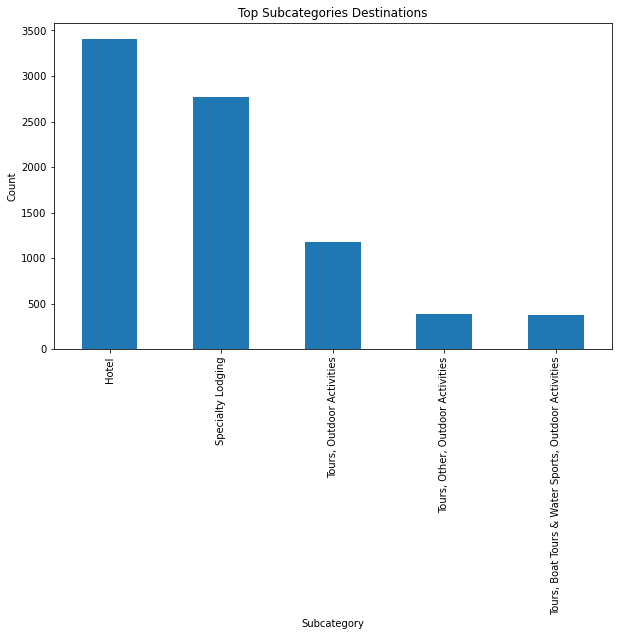

In [70]:
# Get value counts of production companies
subcategory_counts = clean_df['subcategories'].value_counts()

# Select the top 5 production companies
top_subcategories = subcategory_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar')
plt.title('Top Subcategories Destinations')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('../Data/images/top_subcategories')
plt.show()

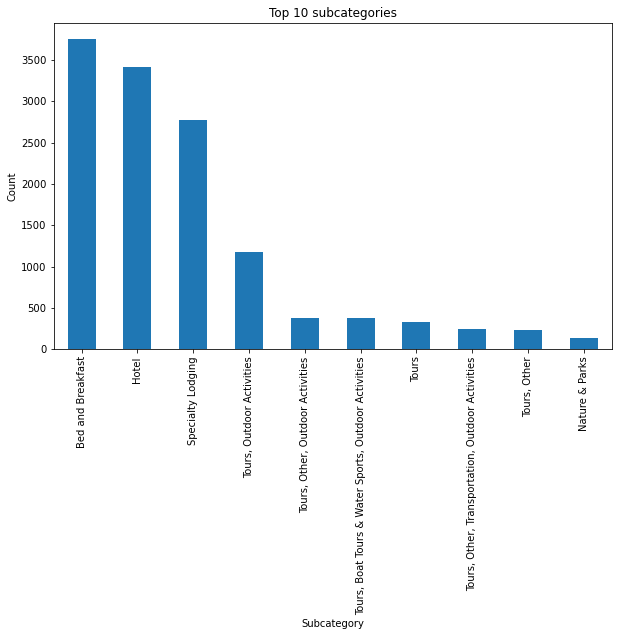

In [71]:
# Plotting 'Subcategoris' (top 10)
plt.figure(figsize=(10, 6))
top_10_subcategories = clean_df['subcategories'].explode().value_counts().head(10)
top_10_subcategories.plot(kind='bar')
plt.title('Top 10 subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('../Data/images/top_10_subcategories_individually.png')
plt.show()

In [76]:
# # Histogram plots for each data
# # Select the numerical variables to plot
# num_cols_to_plot = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop([])
# print("Columns to plot:",num_cols_to_plot )
# # Create a histogram for each variable
# clean_df[num_cols_to_plot].hist(figsize=(25, 12))
# # plt.savefig('../Data/images/columnstoplot')
# plt.show()

In [78]:
# Detect outliers using z-score method
zscore_threshold = 3  # Adjust this threshold based on your data and requirements
outliers = df[(df['latitude'] >= -35) & (df['latitude'] <= 37) & (df['longitude'] >= -25) & (df['longitude'] <= 60) &
                (np.abs(stats.zscore(df[['latitude', 'longitude']])) > zscore_threshold).any(axis=1)]

# Replace outliers with NaN values in the original DataFrame
df.loc[outliers.index, ['latitude', 'longitude']] = None


# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(lat=8, lon=20),
        pitch=0,
        zoom=2
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=clean_df['latitude'],
    lon=clean_df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=clean_df['rating'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in clean_df['UpperPrice']],
    hovertext = clean_df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Location: {x['locationString']}", axis=1),
)


# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
#plt.savefig('../Data/images/map')
fig.show()

In [79]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

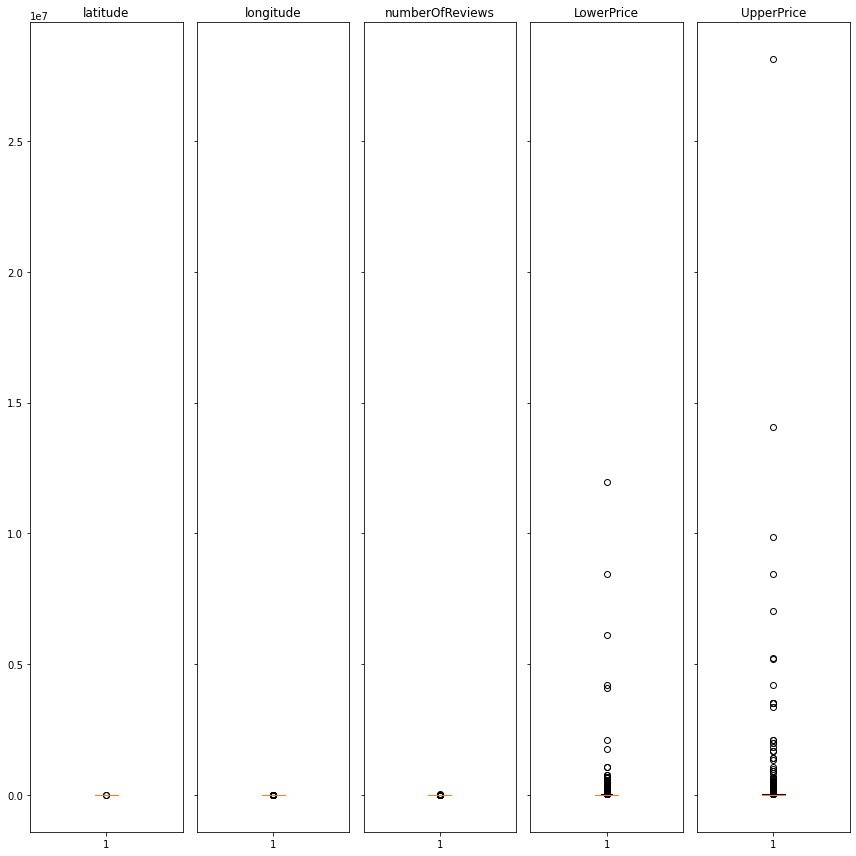

In [80]:
# Select the variables you want to plot

cols_to_plot = ['latitude', 'longitude', 'numberOfReviews', 'LowerPrice', 'UpperPrice']

######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12, 12), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', which='major')

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
# plt.savefig(r"..Data/images/Outliers.png")
# Show the figure
plt.show()

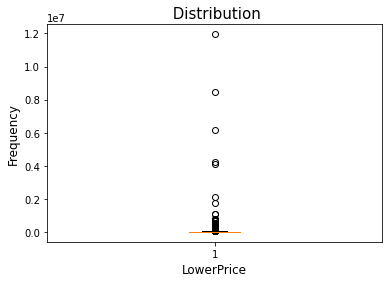

In [82]:
# Checking for outliers in the 'latitude' column
plt.boxplot(clean_df['LowerPrice'])
plt.xlabel("LowerPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
#plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

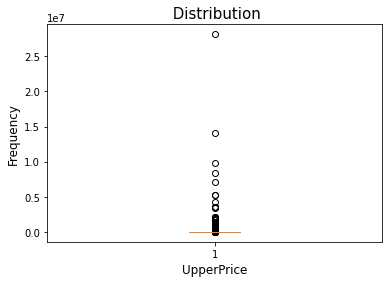

In [83]:
# Checking for outliers in the 'popularity' column
plt.boxplot(clean_df['UpperPrice'])
plt.xlabel("UpperPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
# plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

In [84]:
## Multicollinearity

# # Create a correlation matrix
# corr_matrix = clean_df.corr()
# # Create a fig size
# plt.figure(figsize=(16, 16))
# # Create a mask to show only the lower triangle
# mask = np.zeros_like(corr_matrix, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Plot the heatmap with the lower triangle mask applied
# sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# # Show the plot
# plt.show();
# # Save figure
# plt.savefig('../Data/images/multicollinearity.png')

## Modelling

In [85]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [99]:
clean_df[['id', 'rating','name', 'Rank', 'Total','regional_rating','subcategories', 'RankingType', 'locationString','country','city', 'LowerPrice', 'UpperPrice']]


id  rating                   name  Rank  Total  regional_rating  \
0       8661504     4.5     Bukima Tented Camp   2.0    3.0         1.500000   
1        312427     3.0   Grand Hotel Kinshasa  14.0   43.0         3.071429   
2       5560515     3.5     Symphonie des Arts  15.0  105.0         7.000000   
3      12274281     5.0           Ixoras Hotel   9.0   67.0         7.444444   
4        481185     4.0              Ma Vallee   2.0  105.0        52.500000   
...         ...     ...                    ...   ...    ...              ...   
14479  15528300     2.0           Bobbywashere  17.0   37.0         2.176471   
14480   2080050     3.0          Hotel America  24.0   41.0         1.708333   
14481   2509231     2.5  Hotel Casa Felicidade  23.0   41.0         1.782609   
14482  13351042     1.0       De Prince Pensao  15.0   22.0         1.466667   
14483  12691260     1.5        Hotel Cachoeira   3.0    4.0         1.333333   

                                           subcategories        RankingType  \
0                                      Specialty Lodging  Specialty lodging   
1                                                  Hotel             hotels   
2      Shopping, Sights & Landmarks, Museums, Nature ...       things to do   
3                                      Bed and Breakfast  Specialty lodging   
4                                         Nature & Parks       things to do   
...                                                  ...                ...   
14479                                  Specialty Lodging  Specialty lodging   
14480                                  Bed and Breakfast  Specialty lodging   
14481                                  Bed and Breakfast  Specialty lodging   
14482                                  Bed and Breakfast  Specialty lodging   
14483                                              Hotel             hotels   

                       locationString                           country  \
0      Rumangabo, North Kivu Province  Democratic Republic of the Congo   
1                            Kinshasa  Democratic Republic of the Congo   
2                            Kinshasa  Democratic Republic of the Congo   
3                            Kinshasa  Democratic Republic of the Congo   
4                            Kinshasa  Democratic Republic of the Congo   
...                               ...                               ...   
14479              Sal Rei, Boa Vista                        Cape Verde   
14480                 Praia, Santiago                        Cape Verde   
14481                 Praia, Santiago                        Cape Verde   
14482                Sao Filipe, Fogo                        Cape Verde   
14483              Tarrafal, Santiago                        Cape Verde   

             city    LowerPrice    UpperPrice  
0       Rumangabo  13777.392428  23045.636246  
1        Kinshasa  36287.000000  45992.000000  
2        Kinshasa    141.000000    281.000000  
3        Kinshasa  11955.000000  16878.000000  
4        Kinshasa    141.000000    281.000000  
...           ...           ...           ...  
14479     Sal Rei   7736.000000  17581.000000  
14480       Praia  13777.392428  23045.636246  
14481       Praia  13777.392428  23045.636246  
14482  Sao Filipe  13777.392428  23045.636246  
14483    Tarrafal  13777.392428  23045.636246  

[14466 rows x 13 columns]

In [87]:
clean_df.shape

(14466, 19)

### 1. Prepare the data

##### * Dealing with outliers in the numerical columns

In [ ]:
# from sklearn.cluster import KMeans

# # Select the numerical features for clustering
# numerical_columns = clean_df.select_dtypes(include=[np.number]).columns
# numerical_data = clean_df[numerical_columns]

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
# kmeans.fit(numerical_data)

# # Assign each data point to a cluster
# labels = kmeans.labels_

# # Identify the cluster with the outliers
# outlier_cluster = np.argmax(np.bincount(labels))

# # Remove the rows belonging to the outlier cluster
# clean_df = clean_df[labels != outlier_cluster]


### Baseline Model

In [88]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'Rank', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
baseline_model = KNNBasic(random_state=42)
baseline_model.fit(trainset)

# Evaluate the model
predictions1 = baseline_model.test(testset)
accuracy1 = sup_accuracy.rmse(predictions1)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7023



Root Mean Square Error (RMSE) is a measure of the model's prediction accuracy. In the context of recommendation systems, it quantifies the average difference between the predicted ratings and the actual ratings given by the users. A lower RMSE value indicates better model performance. In this case, the RMSE is 41.8541, which suggests that the model's predictions have a relatively high level of error.

In [89]:
for prediction in predictions1:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")

Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rat

---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 1.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 1.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted

Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 0.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rat

---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted

Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rat

Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 3.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 3.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.42
Actual rating: 1.50
---
Predicted rating: 4.42
Actual rating

In [90]:
threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions1:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision1 = true_positives / (true_positives + false_positives)
recall1 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")


Precision: 0.98
Recall: 1.00


Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how accurate the model is when it predicts positive instances. A precision score of 0.76 means that 76% of the instances predicted as positive were actually positive.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates how well the model captures the positive instances. A recall score of 1.00 means that the model successfully identified all positive instances.

In [ ]:
#model_data = reviews[['userId', 'locationId', 'rating']]
#model_data

In [ ]:
# Load the data into Surprise Dataset format
#reader = Reader(rating_scale=(1, 5))
#data = Dataset.load_from_df(model_data[['userId', 'locationId', 'rating']], reader)

# Split the data into train and test sets
#trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
#model = SVD(random_state=42)
#model.fit(trainset)

# Evaluate the model
#predictions = model.test(testset)
#accuracy = sup_accuracy.rmse(predictions)


The RMSE (Root Mean Squared Error) value of 0.7598 indicates the average prediction error of the model on the test set. A lower RMSE value indicates better accuracy of the model's predictions.

In the context of collaborative filtering recommendation systems, the RMSE represents how well the model is able to predict user ratings for items. A lower RMSE implies that the model is better at predicting user preferences and provides more accurate recommendations.

RMSE of 0.7598 suggests that the model has reasonably good predictive performance. as can be observed below.

In [91]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [92]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'Rank', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model2 = SVD(random_state=42)
model2.fit(trainset)

# Evaluate the model
predictions2 = model2.test(testset)
accuracy2 = sup_accuracy.rmse(predictions2)

RMSE: 0.6904


RMSE of 44.0078 means that, on average, the predictions made by the model have an error of approximately 44.0078 units. The RMSE gives you an idea of how well your model's predictions align with the true values. The lower the RMSE, the better the model's performance.

To further evaluate the significance of the RMSE value, it's important to consider the scale and context of your specific problem. Additionally, comparing the RMSE to the range of the target variable can provide insights into the relative performance of the model.

In [93]:
for prediction in predictions2:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")

Predicted rating: 4.52
Actual rating: 3.00
---
Predicted rating: 4.26
Actual rating: 4.00
---
Predicted rating: 4.33
Actual rating: 3.50
---
Predicted rating: 4.54
Actual rating: 4.50
---
Predicted rating: 4.38
Actual rating: 3.00
---
Predicted rating: 4.27
Actual rating: 5.00
---
Predicted rating: 4.63
Actual rating: 4.00
---
Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.51
Actual rating: 5.00
---
Predicted rating: 4.63
Actual rating: 4.50
---
Predicted rating: 4.51
Actual rating: 3.00
---
Predicted rating: 4.16
Actual rating: 4.00
---
Predicted rating: 4.29
Actual rating: 4.00
---
Predicted rating: 4.63
Actual rating: 5.00
---
Predicted rating: 4.27
Actual rating: 4.00
---
Predicted rating: 4.51
Actual rating: 5.00
---
Predicted rating: 4.63
Actual rating: 5.00
---
Predicted rating: 4.38
Actual rating: 4.00
---
Predicted rating: 4.43
Actual rating: 4.50
---
Predicted rating: 4.45
Actual rating: 5.00
---
Predicted rating: 4.38
Actual rating: 3.50
---
Predicted rat

---
Predicted rating: 4.25
Actual rating: 3.50
---
Predicted rating: 4.54
Actual rating: 5.00
---
Predicted rating: 4.25
Actual rating: 4.50
---
Predicted rating: 4.38
Actual rating: 5.00
---
Predicted rating: 4.35
Actual rating: 4.50
---
Predicted rating: 4.54
Actual rating: 5.00
---
Predicted rating: 4.44
Actual rating: 4.50
---
Predicted rating: 4.27
Actual rating: 4.00
---
Predicted rating: 4.43
Actual rating: 5.00
---
Predicted rating: 4.54
Actual rating: 4.50
---
Predicted rating: 4.34
Actual rating: 5.00
---
Predicted rating: 4.40
Actual rating: 4.00
---
Predicted rating: 4.34
Actual rating: 4.50
---
Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.52
Actual rating: 4.00
---
Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.43
Actual rating: 3.50
---
Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.44
Actual rating: 3.50
---
Predicted rating: 4.32
Actual rating: 4.50
---
Predicted rating: 4.52
Actual rating: 4.50
---
Predicted

Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.37
Actual rating: 3.00
---
Predicted rating: 4.29
Actual rating: 5.00
---
Predicted rating: 4.47
Actual rating: 4.50
---
Predicted rating: 4.29
Actual rating: 3.50
---
Predicted rating: 4.54
Actual rating: 3.00
---
Predicted rating: 4.33
Actual rating: 4.00
---
Predicted rating: 4.45
Actual rating: 4.00
---
Predicted rating: 4.43
Actual rating: 4.50
---
Predicted rating: 4.63
Actual rating: 5.00
---
Predicted rating: 4.41
Actual rating: 3.00
---
Predicted rating: 4.30
Actual rating: 5.00
---
Predicted rating: 4.45
Actual rating: 3.50
---
Predicted rating: 4.51
Actual rating: 5.00
---
Predicted rating: 4.43
Actual rating: 4.50
---
Predicted rating: 4.41
Actual rating: 4.50
---
Predicted rating: 4.45
Actual rating: 4.50
---
Predicted rating: 4.41
Actual rating: 4.00
---
Predicted rating: 4.63
Actual rating: 4.50
---
Predicted rating: 4.22
Actual rating: 3.50
---
Predicted rating: 4.43
Actual rating: 3.50
---
Predicted rat

Predicted rating: 4.24
Actual rating: 4.00
---
Predicted rating: 4.35
Actual rating: 5.00
---
Predicted rating: 4.27
Actual rating: 5.00
---
Predicted rating: 4.41
Actual rating: 4.00
---
Predicted rating: 4.63
Actual rating: 4.50
---
Predicted rating: 4.63
Actual rating: 5.00
---
Predicted rating: 4.42
Actual rating: 4.50
---
Predicted rating: 4.45
Actual rating: 4.00
---
Predicted rating: 4.52
Actual rating: 4.50
---
Predicted rating: 4.33
Actual rating: 4.00
---
Predicted rating: 4.40
Actual rating: 3.50
---
Predicted rating: 4.43
Actual rating: 4.00
---
Predicted rating: 4.51
Actual rating: 5.00
---
Predicted rating: 4.52
Actual rating: 5.00
---
Predicted rating: 4.54
Actual rating: 5.00
---
Predicted rating: 4.23
Actual rating: 4.00
---
Predicted rating: 4.40
Actual rating: 3.50
---
Predicted rating: 4.37
Actual rating: 1.00
---
Predicted rating: 4.63
Actual rating: 4.50
---
Predicted rating: 4.63
Actual rating: 4.50
---
Predicted rating: 4.34
Actual rating: 3.50
---
Predicted rat

Predicted rating: 4.43
Actual rating: 4.00
---
Predicted rating: 4.47
Actual rating: 4.00
---
Predicted rating: 4.16
Actual rating: 5.00
---
Predicted rating: 4.38
Actual rating: 5.00
---
Predicted rating: 4.52
Actual rating: 4.50
---
Predicted rating: 4.26
Actual rating: 5.00
---
Predicted rating: 4.36
Actual rating: 4.50
---
Predicted rating: 4.63
Actual rating: 3.50
---
Predicted rating: 4.41
Actual rating: 5.00
---
Predicted rating: 4.54
Actual rating: 5.00
---
Predicted rating: 4.54
Actual rating: 5.00
---
Predicted rating: 4.31
Actual rating: 3.50
---
Predicted rating: 4.32
Actual rating: 4.50
---
Predicted rating: 4.54
Actual rating: 3.50
---
Predicted rating: 4.30
Actual rating: 5.00
---
Predicted rating: 4.36
Actual rating: 5.00
---
Predicted rating: 3.90
Actual rating: 4.00
---
Predicted rating: 4.41
Actual rating: 4.50
---
Predicted rating: 4.39
Actual rating: 4.00
---
Predicted rating: 4.27
Actual rating: 2.00
---
Predicted rating: 4.51
Actual rating: 4.50
---
Predicted rat

In the code below, we will iterate over the predictions and increment the corresponding counters based on the predicted ratings and actual ratings. Then, we calculate precision by dividing the number of true positives by the sum of true positives and false positives. Recall is calculated by dividing the number of true positives by the sum of true positives and false negatives.

Note that this calculation assumes a binary classification problem where ratings above the threshold are considered positive and ratings below the threshold are considered negative. 

In [94]:
threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions2:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision2 = true_positives / (true_positives + false_positives)
recall2 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")


Precision: 0.98
Recall: 1.00


Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how accurate the model is when it predicts positive instances. A precision score of 0.77 means that 77% of the instances predicted as positive were actually positive.

Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates how well the model captures the positive instances. A recall score of 1.00 means that the model successfully identified all positive instances.

In [95]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'regional_rating', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model3 = KNNBasic(random_state=42)
model3.fit(trainset)

# Evaluate the model
predictions3 = model3.test(testset)
accuracy3 = sup_accuracy.rmse(predictions3)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions3:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision3 = true_positives / (true_positives + false_positives)
recall3 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7023
Precision: 0.98
Recall: 1.00


the RMSE value suggests that the model's predictions have an average deviation of 67.3796 from the actual ratings.
A precision value of 0.70 means that out of all the recommendations predicted as positive by the model, 70% of them are actually relevant or accurate.
A recall value of 1.00 means that out of all the actual positive recommendations, the model is able to identify and predict 100% of them accurately.

In [96]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'regional_rating', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model4 = SVD(random_state=42)
model4.fit(trainset)

# Evaluate the model
predictions4 = model4.test(testset)
accuracy4 = sup_accuracy.rmse(predictions4)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions4:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision4 = true_positives / (true_positives + false_positives)
recall4 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision4:.2f}")
print(f"Recall: {recall4:.2f}")

RMSE: 0.6901
Precision: 0.98
Recall: 1.00


the RMSE value suggests that the model's predictions have an average deviation of 61.6452 from the actual ratings. A precision value of 0.70 means that out of all the recommendations predicted as positive by the model, 70% of them are actually relevant or accurate.  A recall value of 1.00 means that the model is able to identify and predict all of the actual positive recommendations accurately.

In [100]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'regional_rating', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model5 = NMF(random_state=42)
model5.fit(trainset)

# Evaluate the model
predictions5 = model5.test(testset)
accuracy5 = sup_accuracy.rmse(predictions5)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions5:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision5 = true_positives / (true_positives + false_positives)
recall5 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision5:.2f}")
print(f"Recall: {recall5:.2f}")

ZeroDivisionError: float division

In [101]:
# model with KNNwithMeans
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'subcategories', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define the item-based collaborative filtering model
model6 = KNNWithMeans(sim_options={'user_based': False})

# Train the model
model6.fit(trainset)

# Make predictions on the test set
predictions6 = model6.test(testset)

# Evaluate the model using RMSE
rmse_score6 = sup_accuracy.rmse(predictions6)
#print("RMSE:", rmse_score6)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7023


The root mean squared error (RMSE) for the predictions on the test set is 0.7981. RMSE is a measure of the difference between the predicted ratings and the actual ratings, with lower values indicating better performance.

The R-squared value of -0.0697 suggests that the model's predictions do not explain much of the variance in the ratings. A negative R-squared value indicates that the model performs worse than a horizontal line (a model that predicts the average rating for all items). You may need to investigate further and consider other evaluation metrics to assess the performance of your recommendation model.

We will check the other models performance based on the r squared metric to see how they performed. 

In [103]:
# Extract the actual ratings and predicted ratings from the predictions
actual_ratings1 = [pred.r_ui for pred in predictions1]
predicted_ratings1 = [pred.est for pred in predictions1]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings2 = [pred.r_ui for pred in predictions2]
predicted_ratings2 = [pred.est for pred in predictions2]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings3 = [pred.r_ui for pred in predictions3]
predicted_ratings3 = [pred.est for pred in predictions3]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings4 = [pred.r_ui for pred in predictions4]
predicted_ratings4 = [pred.est for pred in predictions4]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings5 = [pred.r_ui for pred in predictions5]
predicted_ratings5 = [pred.est for pred in predictions5]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings6 = [pred.r_ui for pred in predictions6]
predicted_ratings6 = [pred.est for pred in predictions6]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings7 = [pred.r_ui for pred in predictions7]
predicted_ratings7 = [pred.est for pred in predictions7]

# List of predictions and corresponding names
prediction_sets = [
    (predictions1, "Predictions 1"),
    (predictions2, "Predictions 2"),
    (predictions3, "Predictions 3"),
    (predictions4, "Predictions 4"),
    (predictions5, "Predictions 5"),
    (predictions6, "Predictions 6"),
    (predictions7, "Predictions 7")
]

# Iterate over the prediction sets
for predictions, name in prediction_sets:
    # Extract the actual ratings and predicted ratings from the predictions
    actual_ratings = [pred.r_ui for pred in predictions]
    predicted_ratings = [pred.est for pred in predictions]

    # Print the results
    print("Results for", name)
    print("Actual Ratings:", actual_ratings)
    print("Predicted Ratings:", predicted_ratings)
    print()



Results for Predictions 1
Actual Ratings: [3.0, 4.0, 3.5, 4.5, 3.0, 5.0, 4.0, 5.0, 5.0, 4.5, 3.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.5, 5.0, 3.5, 0.0, 3.5, 4.5, 4.0, 4.5, 4.5, 4.0, 4.0, 3.5, 4.0, 5.0, 4.5, 3.5, 2.5, 2.5, 4.5, 4.0, 5.0, 4.5, 5.0, 4.0, 3.5, 5.0, 5.0, 4.5, 4.5, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.5, 4.0, 4.5, 4.5, 4.5, 4.5, 4.5, 5.0, 4.0, 5.0, 4.0, 4.0, 4.5, 4.5, 4.5, 4.0, 2.5, 4.0, 3.5, 4.5, 5.0, 5.0, 4.5, 5.0, 3.0, 4.5, 4.0, 5.0, 5.0, 4.5, 5.0, 4.0, 4.0, 5.0, 4.5, 4.0, 4.5, 4.5, 4.0, 3.5, 3.5, 4.5, 4.5, 5.0, 4.5, 4.5, 5.0, 5.0, 5.0, 4.5, 3.5, 5.0, 5.0, 4.0, 4.5, 3.5, 3.5, 5.0, 4.0, 4.0, 3.5, 4.5, 5.0, 4.0, 5.0, 4.0, 4.5, 4.5, 5.0, 3.5, 4.5, 5.0, 4.5, 4.0, 4.5, 4.0, 5.0, 5.0, 5.0, 5.0, 3.5, 5.0, 4.5, 4.5, 5.0, 5.0, 5.0, 4.5, 4.0, 5.0, 5.0, 5.0, 4.0, 4.5, 4.5, 4.0, 5.0, 3.0, 4.5, 5.0, 5.0, 5.0, 4.5, 4.0, 5.0, 5.0, 4.0, 5.0, 3.5, 5.0, 3.0, 4.5, 5.0, 5.0, 4.5, 3.5, 4.5, 5.0, 5.0, 4.0, 5.0, 4.5, 3.5, 4.5, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 3.5, 4.5, 5.0, 1.0, 4.5, 4.5, 5.0, 4.5, 3.

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher value indicates a better fit of the model to the data. In this case, the R-squared values are negative, which suggests that the model does not fit the data well and may not be providing meaningful predictions.

In [105]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'amenities', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
model6 = NMF(random_state=42)
model6.fit(trainset)

# Evaluate the model
predictions6 = model6.test(testset)
accuracy6 = sup_accuracy.rmse(predictions6)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions6:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision6 = true_positives / (true_positives + false_positives)
recall6 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision6:.2f}")
print(f"Recall: {recall6:.2f}")

ZeroDivisionError: float division

In [106]:
# creating a relevant columns from the above dataset 
vectorization_columns = clean_df[['name', 'subcategories', 'amenities']]

In [ ]:
vectorization_columns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert relevant data into a list of strings
documents = []
for _, row in vectorization_columns.iterrows():
    name = row['name']
    subcategories = row['subcategories']
    amenities = row['amenities']
    doc = f"{name} {subcategories} {amenities}"
    documents.append(doc)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute cosine similarity matrix
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
def get_item_recommendations(item_index, cosine_similarities, top_n=5):
    # Get similarity scores for the item
    item_scores = list(enumerate(cosine_similarities[item_index]))

    # Sort items based on similarity scores
    item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)

    # Get top-N similar items
    top_items = item_scores[1 : top_n + 1]  # Exclude the item itself

    return top_items

# Get recommendations for a specific item (e.g., item with index 0)
item_index = 0
recommendations = get_item_recommendations(item_index, cosine_similarities)

# Print the top 5 recommendations
for item_id, similarity in recommendations:
    print(f"Item ID: {item_id}, Similarity: {similarity}")

## Model Three

In [ ]:
# Construct the TF-IDF Matrix
tfidfv2=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix2=tfidfv2.fit_transform(clean_df['amenities'])
print(tfidfv_matrix2.todense())
tfidfv_matrix2.todense().shape

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate similarity matrix
cosine_sim2 = cosine_similarity(tfidfv_matrix2, tfidfv_matrix2)

In [ ]:
# Create a Pandas Series to map movie titles to their indices
indices = pd.Series(data = list(clean_df.index), index = clean_df['name'])
indices

In [ ]:
def recommend_place(name, cosine_sim2, data):
    # Create a dictionary to map movie titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['name'])}

    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar movies
    recommended_place = clean_df.iloc[indices]['name']
    return recommended_place

In [ ]:
recommend_place("St. Catherine's Monastery Guesthouse", cosine_sim2, clean_df)

In [ ]:
def recommend_amenities(amenity, cosine_sim2, data):
    # Create a dictionary to map movie titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['amenities'])}

    # Get the index of the movie that matches the title
    idx = indices[amenities]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar movies
    recommended_amenities = clean_df.iloc[indices]['amenities']
    return recommended_amenities

In [ ]:
item_1000 = clean_df['amenities'][1000]
item_1000

In [ ]:
recommend_amenities('museum', cosine_sim2, clean_df)

In [ ]:
import numpy as np

def recommend_amenities(amenity, cosine_sim2, data):
    # Create a dictionary to map amenity titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['amenities'])}

    # Get the index of the amenity that matches the title
    idx = indices[amenity]

    # Get the pairwise similarity scores of all amenities with that amenity
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the amenities based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar amenities
    sim_scores = sim_scores[1:11]

    # Get the amenity indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar amenities
    recommended_amenities = clean_df.iloc[indices]['amenities']
    return recommended_amenities

# Evaluation
def evaluate_recommendation_system(test_set, cosine_sim, data):
    # Initialize evaluation metrics
    accuracy = 0
    rmse = 0
    precision = 0
    recall = 0
    total_test_cases = len(test_set)

    # Iterate over each test case
    for test_case in test_set:
        ground_truth_amenity = test_case['ground_truth_amenity']
        predicted_amenities = recommend_amenities(ground_truth_amenity, cosine_sim, data)
        
        # Evaluate metrics for the current test case
        # Compare predicted_amenities with ground truth amenities
        # Calculate accuracy, RMSE, precision, and recall

    # Calculate average metrics
    accuracy /= total_test_cases
    rmse = np.sqrt(rmse / total_test_cases)
    precision /= total_test_cases
    recall /= total_test_cases

    # Return the evaluation metrics
    return accuracy, rmse, precision, recall

# Test set with ground truth amenities
test_set = [
    {'ground_truth_amenity': 'Restaurant'},
    {'ground_truth_amenity': 'Pool'},
    # Add more test cases here...
]

# Calculate evaluation metrics
accuracy, rmse, precision, recall = evaluate_recommendation_system(test_set, cosine_sim2, data)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)


## Model Evaluation

In [110]:
class RecommenderSystem:
    def __init__(self, clean_df, tfidfv_matrix2, cosine_sim2, cosine_similarities, indices):
        self.clean_df = clean_df
        self.tfidfv_matrix2 = tfidfv_matrix2
        self.cosine_sim2 = cosine_sim2
        self.cosine_similarities = cosine_similarities
        self.indices = indices

    def recommend_attraction(self, rating_threshold):
        # Filter the DataFrame based on the rating threshold
        recommendations = self.clean_df[self.clean_df['rating'] > rating_threshold][['name', 'LowerPrice', 'UpperPrice','amenities', 'type', 'country']]

        # Reset the index of the recommendations DataFrame
        recommendations.reset_index(drop=True, inplace=True)

        return recommendations

    def recommend_amenities(self, query):
        # Check if the specified amenity exists in the dataset
        if query not in self.clean_df['amenities'].str.join(', '):
            st.error(f"Error: '{query}' does not exist in the dataset.")
            return None

        # Convert the string representation of amenities back into a list
        self.clean_df['amenities'] = self.clean_df['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

        # Get the index of the specified amenity
        indices = self.clean_df['amenities'].apply(lambda x: query in x if isinstance(x, list) else False)

        # Get the pairwise similarity scores of all items with the specified amenity
        sim_scores = self.cosine_sim2[indices]

        # Flatten the similarity scores
        sim_scores = sim_scores.flatten()

        # Get the indices of the sorted similarity scores
        indices = np.argsort(sim_scores)[::-1]

        # Get the sorted similarity scores
        sim_scores = sim_scores[indices]

        # Get the recommended items
        recommended_items = self.clean_df.iloc[indices]

        return recommended_items

    def recommend_place(self, name):
        # Create a dictionary to map place names to their indices
        indices = {title: index for index, title in enumerate(self.clean_df['name'])}

        # Check if the specified place exists in the dataset
        if name not in indices:
            st.error(f"Error: '{name}' does not exist in the dataset.")
            return None

        # Get the index of the specified place
        idx = indices[name]

        # Get the pairwise similarity scores of all places with the specified place
        sim_scores = list(enumerate(self.cosine_similarities[idx]))

        # Sort the places based on the similarity scores
        sim_scores.sort(key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar places
        sim_scores = sim_scores[1:11]

        # Get the indices of the top-N similar places
        indices = [x for x, _ in sim_scores]

        # Get the recommended places
        recommended_places = self.clean_df.iloc[indices]['name']

        return recommended_places

    def get_item_recommendations(self, item_index, top_n=5):
        # Get similarity scores for the item
        item_scores = list(enumerate(self.cosine_similarities[item_index]))

        # Sort items based on similarity scores
        item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)

        # Get top-N similar items
        top_items = item_scores[1:top_n + 1]  # Exclude the item itself

        return top_items



In [111]:
hybrid = RecommenderSystem('clean_df', 'tfidfv_matrix2', 'cosine_sim2', 'cosine_similarities', 'indices')

In [112]:
recommend_place('Excalibur Boutique Hotel', cosine_sim2, clean_df)

NameError: name 'recommend_place' is not defined

## Tuning

## Deployment

## Conclusion and Recommendations